# **Customer Segmentation Using K-means Clustering**

This project focuses on customer segmentation for a retail mall using KMeans clustering. By analyzing key features such as Annual Income and Spending Score, we group customers into distinct clusters that reflect different purchasing behaviors. The goal is to help businesses tailor marketing strategies, improve customer service, and identify valuable customer segments.

***IMPORTING LIBRARIES***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sns.set(style='whitegrid')

***UPLOADING DATASET***

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


***LOAD DATASET***

In [3]:
data = pd.read_csv("Mall_Customers.csv")
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


**EXPLORE DATA**

In [5]:
print(data.info())
print(data.describe())
print("Missing values in each column:")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

**DATA CLEANING**

In [6]:
data = data.drop_duplicates()
data = data.dropna()
print("Data cleaned. New shape:", data.shape)

Data cleaned. New shape: (200, 5)


**EXPLORE DATA ANALYSIS (EDA) VISUALIZATION**

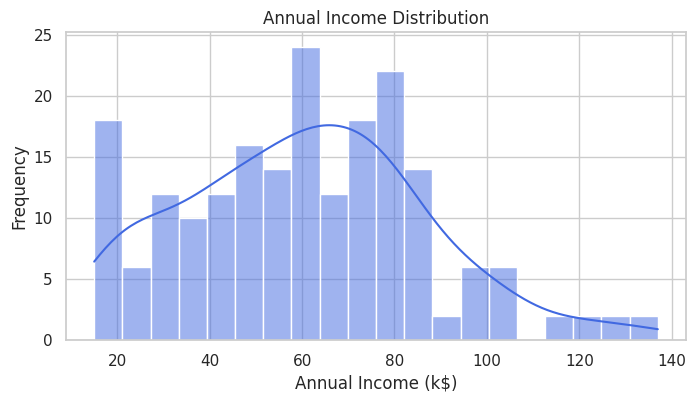

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(data['Annual Income (k$)'], kde=True, color='royalblue', bins=20)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

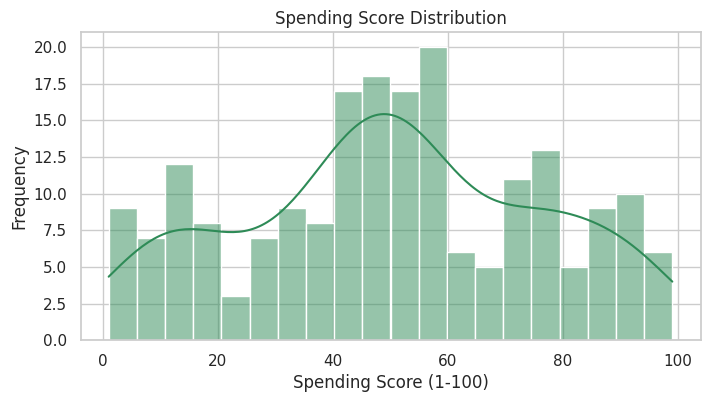

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(data['Spending Score (1-100)'], kde=True, color='seagreen', bins=20)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

***SELECT FEATURES FOR  CLUSTERING***

In [11]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

***SCALE THE FEATURES***

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**FIND THE OPTIMAL NUMBER OF CLUSTERS**
***(ELBOW METHOD)***

Determine best K by finding the 'elbow' point in WCSS plot.

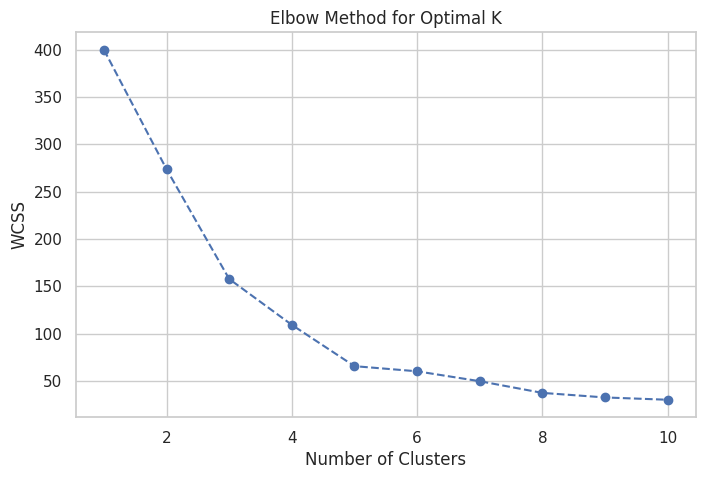

In [13]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

***FIT KMEANS WITH OPTIMAL CLUSTERS***

In [14]:
optimal_k = 5  # Assume 5 from Elbow plot
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
data['Cluster'] = y_kmeans

***ADD CLUSTER LABELS TO DATA***

In [15]:
data['Cluster'] = y_kmeans

***VISUALIZE THE CLUSTERS***

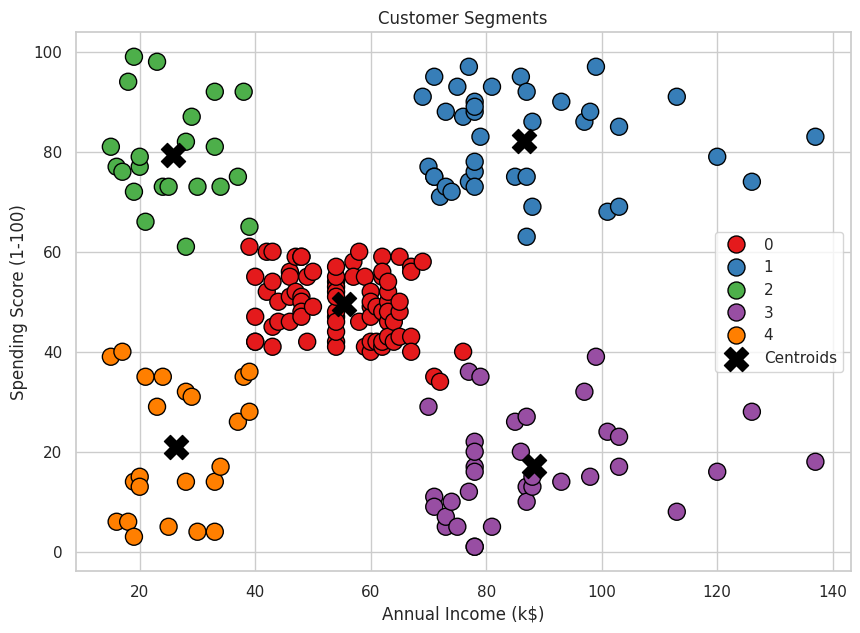

In [16]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster',
                data=data, palette='Set1', s=150, edgecolor='black')
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], c='black', s=300, marker='X', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

***UNDERSTAND CLUSTERS***

In [17]:
print(data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2))

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                     55.30                   49.52
1                     86.54                   82.13
2                     25.73                   79.36
3                     88.20                   17.11
4                     26.30                   20.91


**SUMMARIZING CLUSTERS TO UNDERSTAND THE CHARECTERISTICS OF EACH GROUP**

In [18]:
for i, row in data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2).iterrows():
    print(f"Cluster {i}: Avg Income = {row['Annual Income (k$)']}k$, Avg Spending Score = {row['Spending Score (1-100)']}")

Cluster 0: Avg Income = 55.3k$, Avg Spending Score = 49.52
Cluster 1: Avg Income = 86.54k$, Avg Spending Score = 82.13
Cluster 2: Avg Income = 25.73k$, Avg Spending Score = 79.36
Cluster 3: Avg Income = 88.2k$, Avg Spending Score = 17.11
Cluster 4: Avg Income = 26.3k$, Avg Spending Score = 20.91
